In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
df = pd.read_parquet('case_study_sample_dataset.gzip')

In [3]:
df.head()

,index,test_time,cycle_index,cell_index,voltage,discharge_capacity,current,internal_resistance,temperature
0,834355,1801.8327,0.0,2017-05-12_5_4C-50per_3C_CH13,3.291040,0.000016,-0.450999,0.021151,29.973852
1,834356,1811.8329,0.0,2017-05-12_5_4C-50per_3C_CH13,3.281339,0.001570,-0.559847,0.021151,30.012213
2,834357,1821.8363,0.0,2017-05-12_5_4C-50per_3C_CH13,3.277671,0.003125,-0.559859,0.021151,29.995052
3,834358,1831.8373,0.0,2017-05-12_5_4C-50per_3C_CH13,3.275081,0.004680,-0.559828,0.021151,29.981087
4,834359,1841.8468,0.0,2017-05-12_5_4C-50per_3C_CH13,3.273016,0.006237,-0.559821,0.021151,30.000351


In [4]:
df.sample(10)

,index,test_time,cycle_index,cell_index,voltage,discharge_capacity,current,internal_resistance,temperature
3042881,16575343,173833.8694,407.0,2017-05-12_6C-40per_3_6C_CH33,2.327880,1.017575,-4.400003,0.016389,37.530483
1071680,1906035,366882.8435,356.0,2017-05-12_5_4C-50per_3C_CH14,2.848540,0.919549,-4.400026,0.015722,37.611691
1504371,3559538,206790.0982,558.0,2017-05-12_5_4C-70per_3C_CH17,2.461528,0.912730,-4.400008,0.017068,35.410480
743826,1578181,10234.0567,0.0,2017-05-12_5_4C-50per_3C_CH14,3.165671,0.547471,-0.110004,0.020827,30.038870
650676,1485031,412400.8918,896.0,2017-05-12_5_4C-50per_3C_CH13,2.032175,0.901972,-4.399671,0.017921,37.165768
2601053,12477164,308064.2281,450.0,2017-05-12_5_4C-40per_3_6C_CH20,2.650192,0.983221,-4.400035,0.016867,36.947983
2412884,12288995,68068.4277,20.0,2017-05-12_5_4C-40per_3_6C_CH20,3.407984,0.002880,-4.399876,0.016780,30.261106
632854,1467209,300970.0539,856.0,2017-05-12_5_4C-50per_3C_CH13,3.017549,0.622051,-4.400073,0.017819,33.782990
559669,1394024,256113.6239,688.0,2017-05-12_5_4C-50per_3C_CH13,2.041105,0.999243,-4.400003,0.017247,37.341099
1631388,6899500,9666.0067,0.0,2017-05-12_4C-80per_4C_CH6,3.196632,0.520419,-0.110009,0.021356,29.518721


In [5]:
df.shape

(3246507, 9)

In [6]:
# outlier detection

In [7]:
# Function to plot boxplots by cell_index for each feature
def plot_boxplots_by_cell_index(df, numerical_features):
    # Get unique cell indices
    cell_indices = df['cell_index'].unique()

    # Loop over each cell_index
    for cell in cell_indices:
        # Filter the data for the current cell_index
        cell_data = df[df['cell_index'] == cell]
        
        # Loop through numerical features and plot boxplots
        for feature in numerical_features:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=cell_data[feature])
            plt.title(f"Boxplot of {feature} for Cell Index {cell}")
            plt.xlabel(feature)
            plt.show()

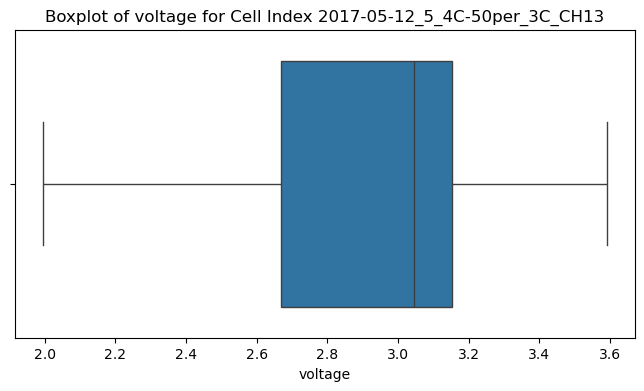

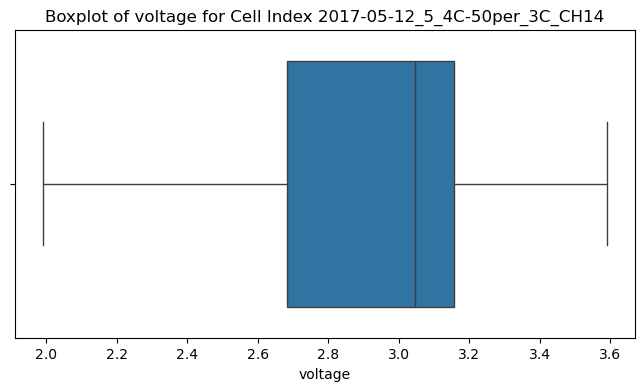

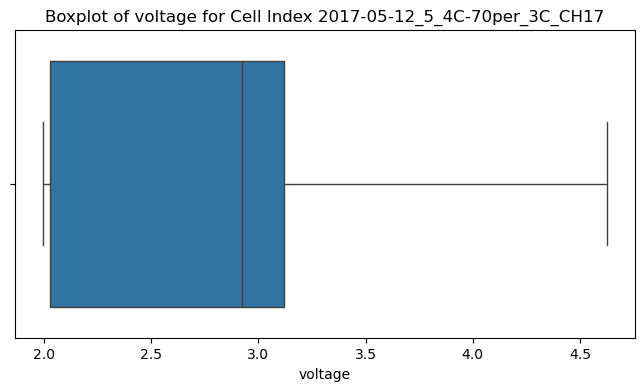

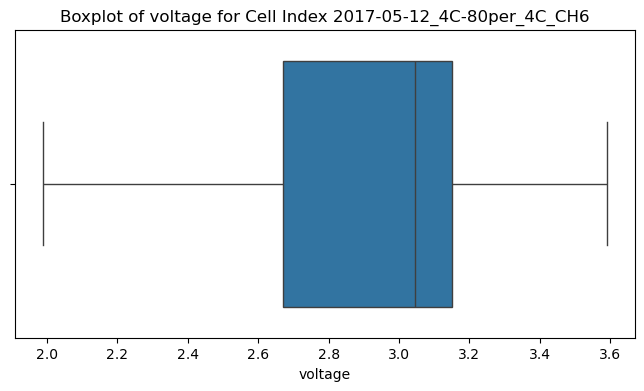

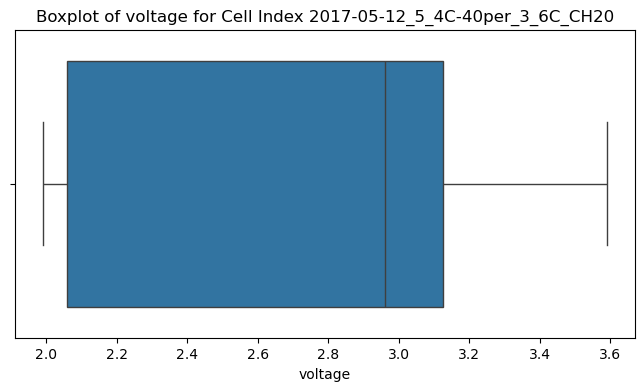

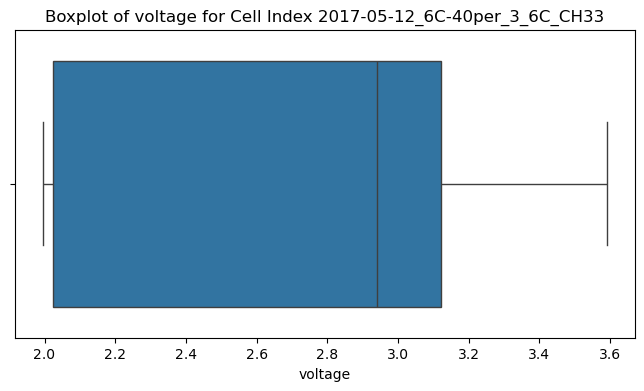

In [7]:
# outlier detection in voltage by cell index
plot_boxplots_by_cell_index(df, ['voltage'])

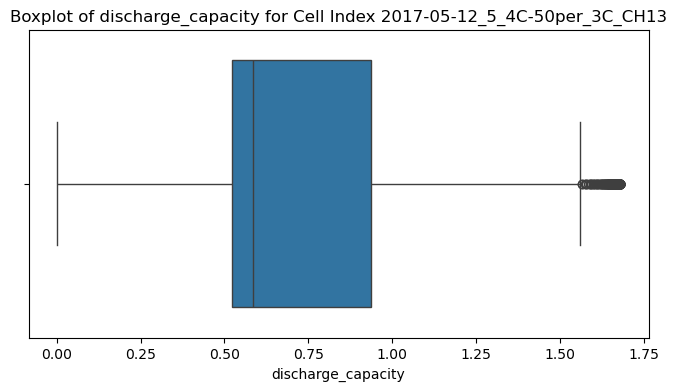

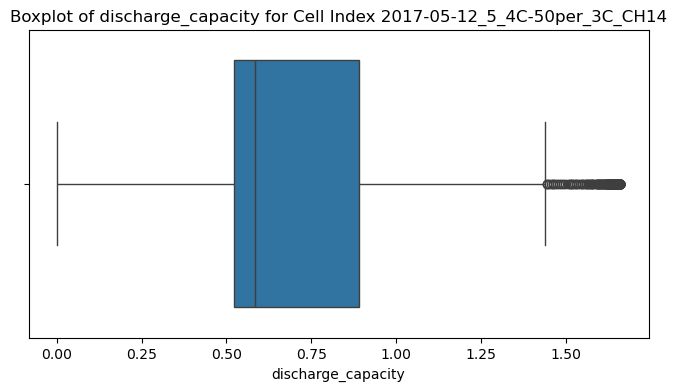

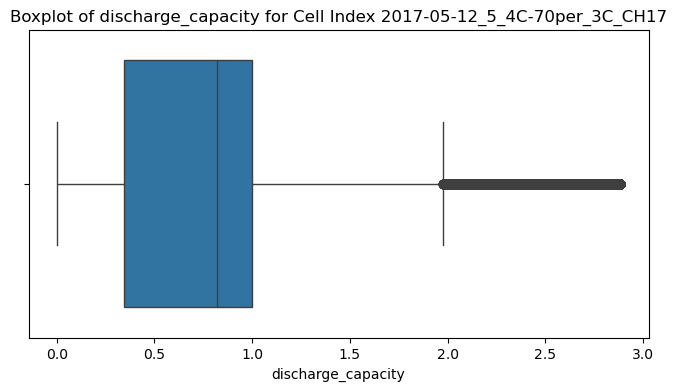

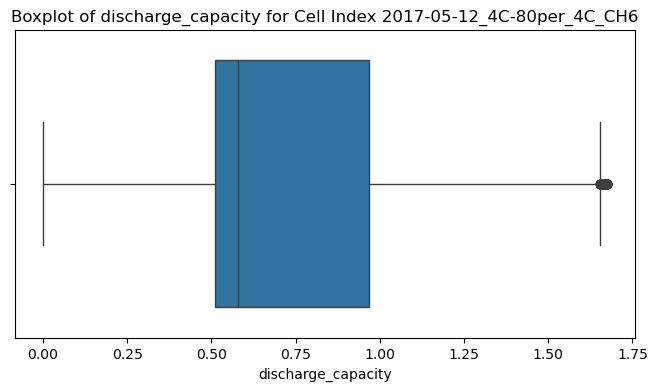

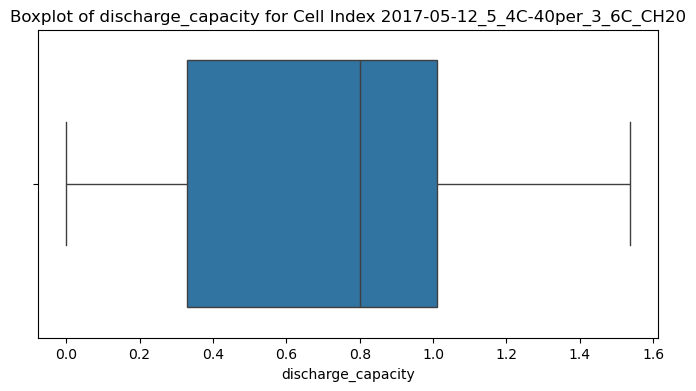

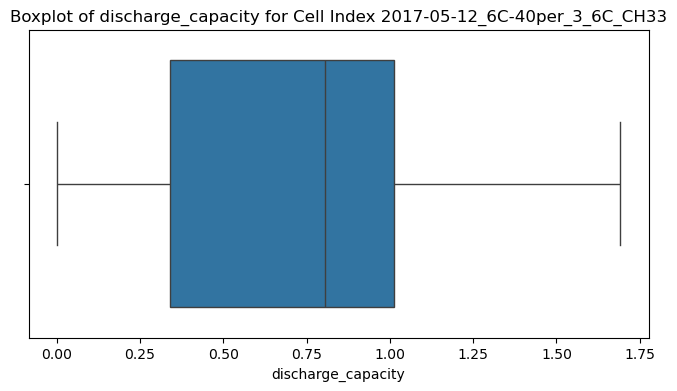

In [8]:
# outlier detection in  by cell index
plot_boxplots_by_cell_index(df, ['discharge_capacity'])

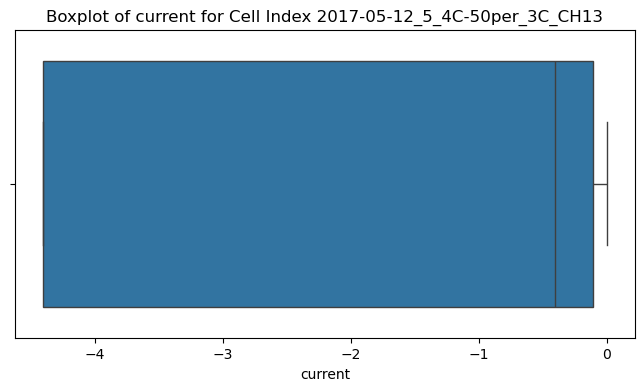

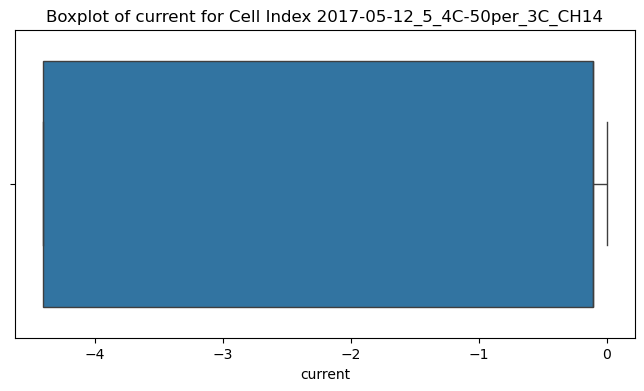

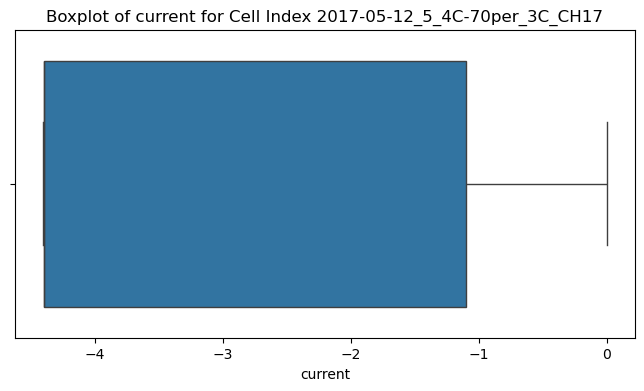

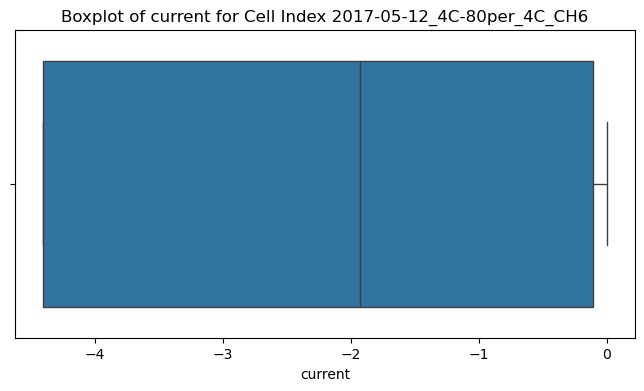

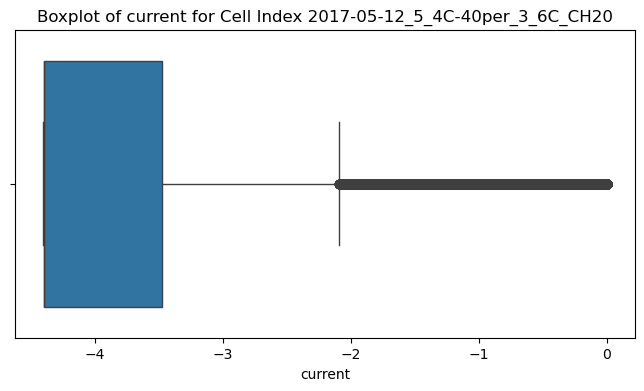

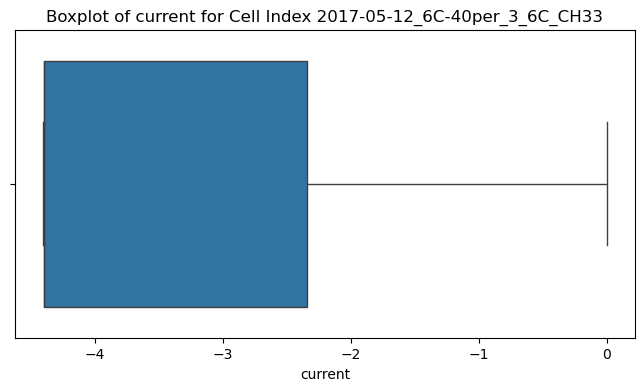

In [9]:
# outlier detection in current by cell index
plot_boxplots_by_cell_index(df, ['current'])

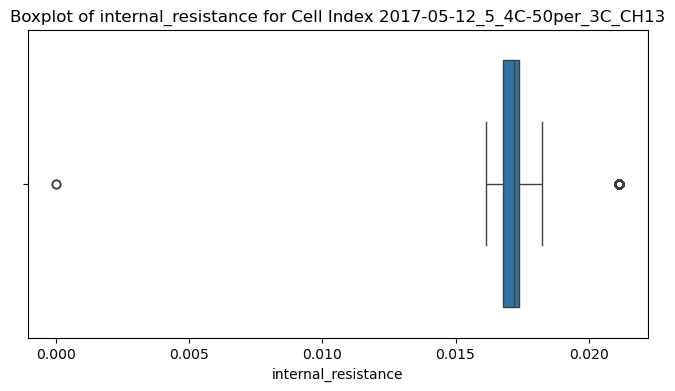

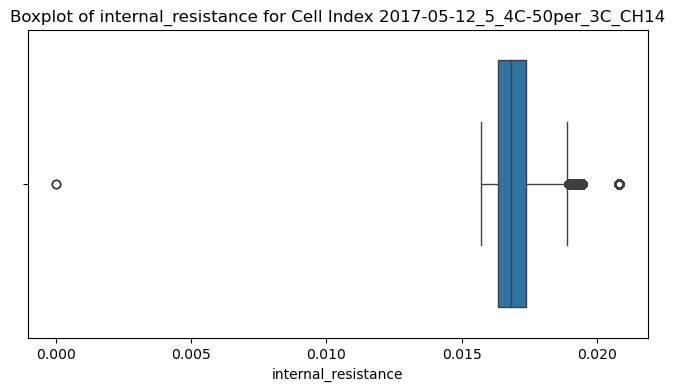

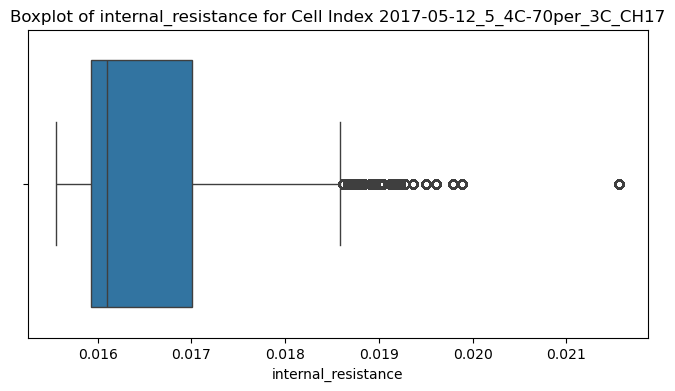

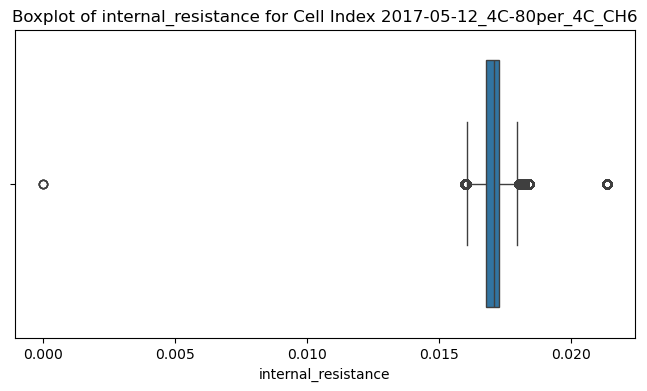

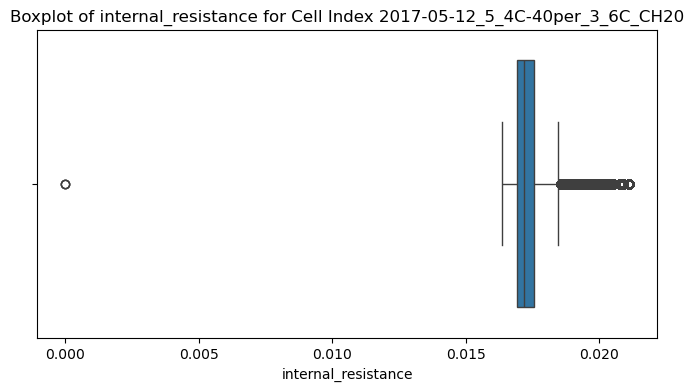

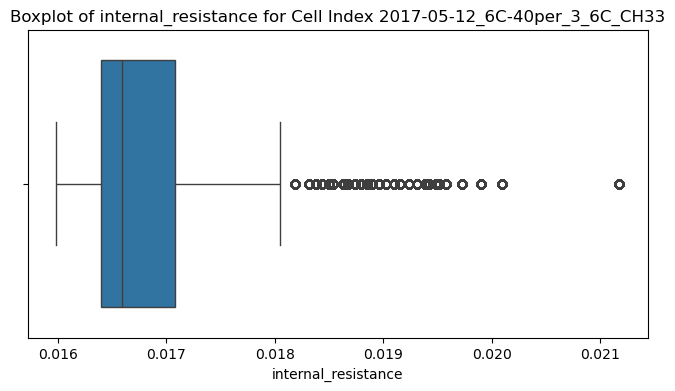

In [10]:
# outlier detection in internal_resistance by cell index
plot_boxplots_by_cell_index(df, ['internal_resistance'])

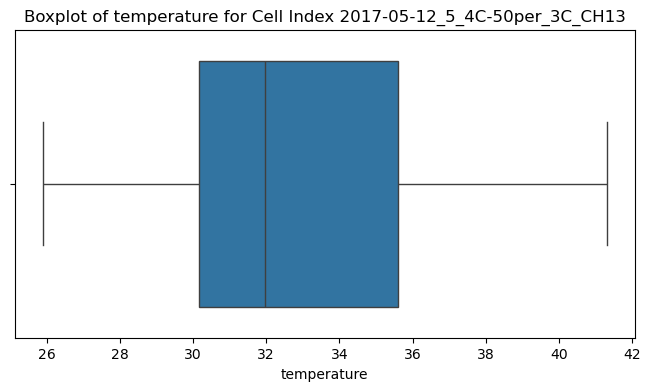

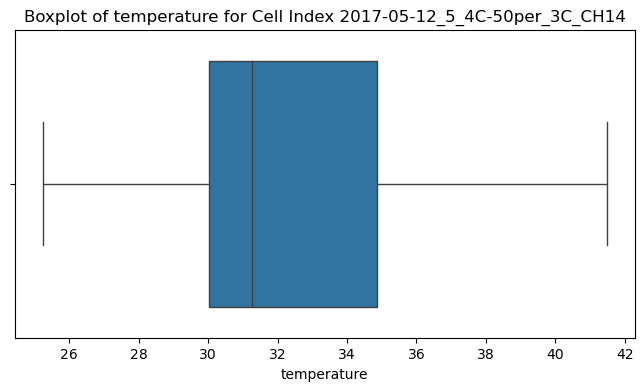

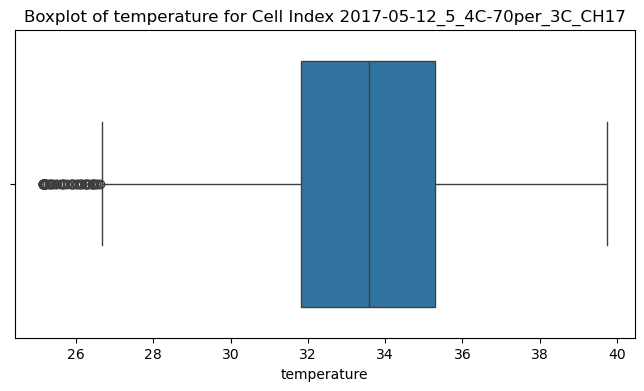

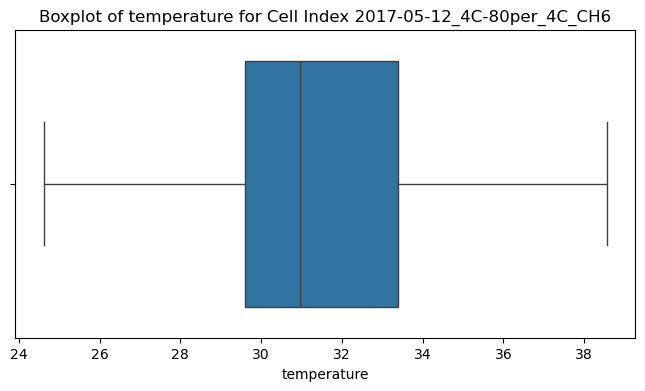

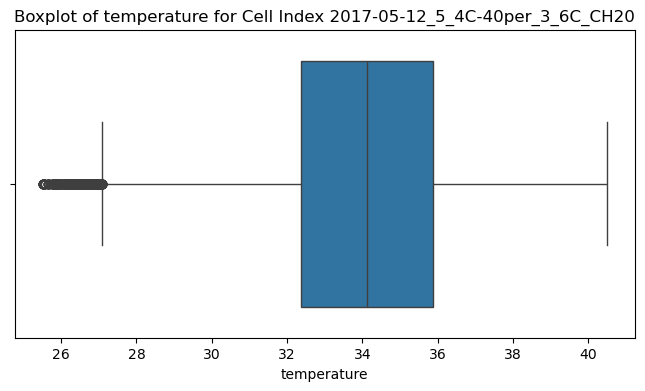

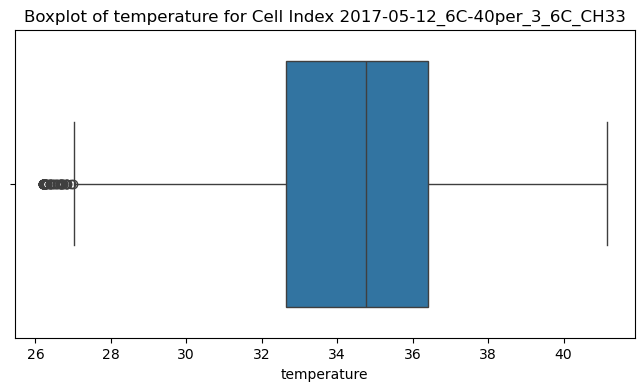

In [11]:
# outlier detection in internal_resistance by cell index
plot_boxplots_by_cell_index(df, ['temperature'])

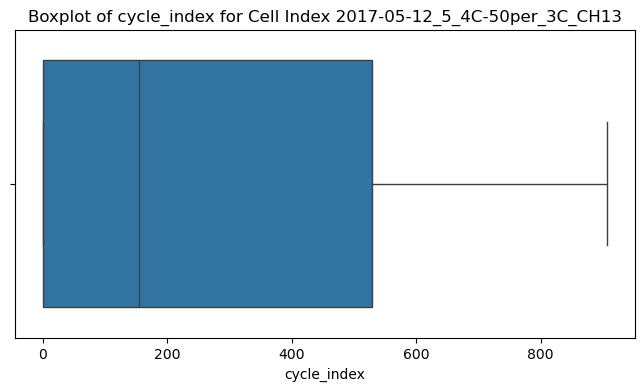

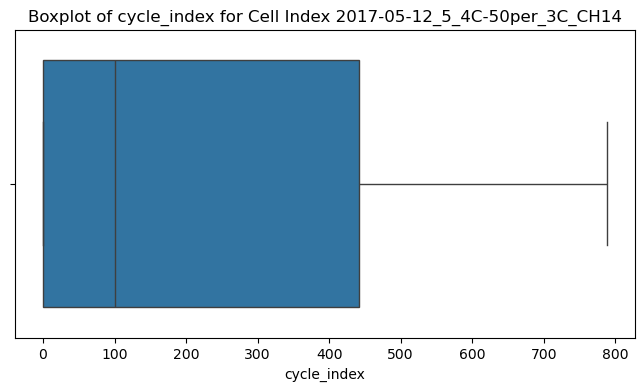

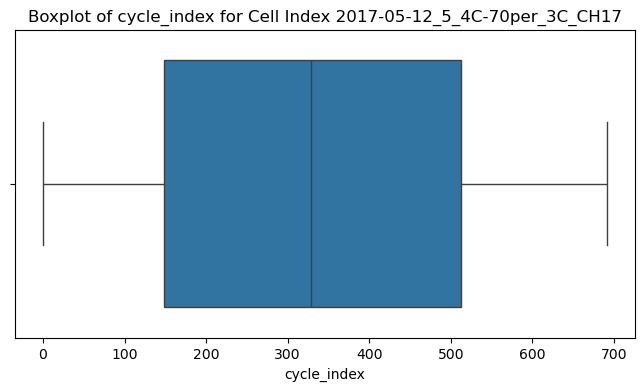

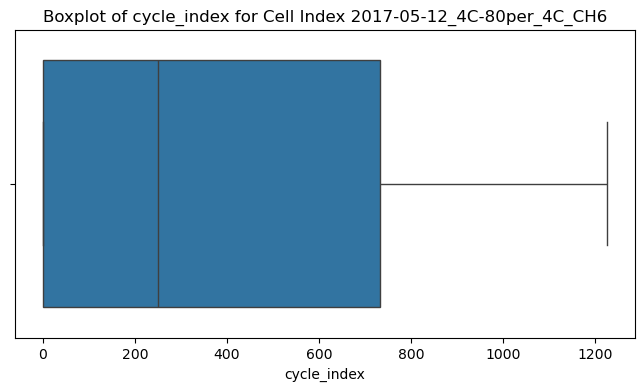

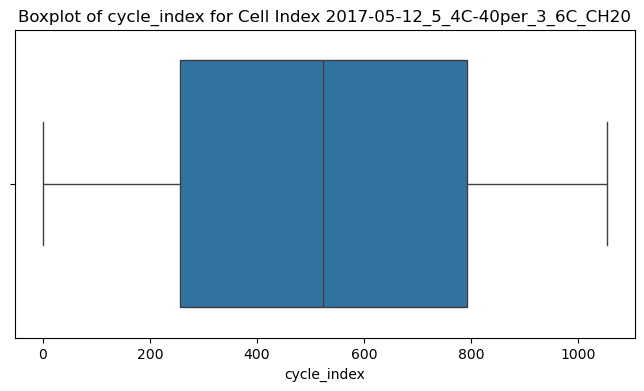

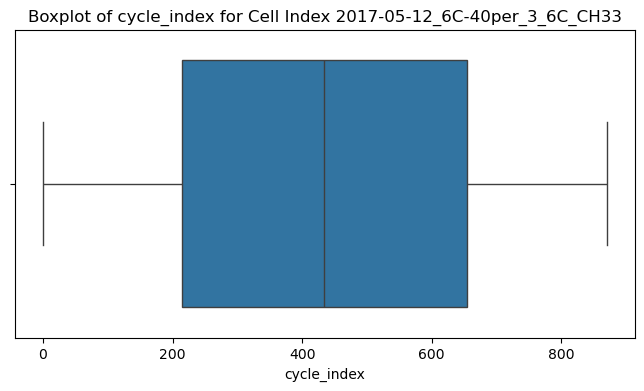

In [12]:
# outlier detection in internal_resistance by cell index
plot_boxplots_by_cell_index(df, ['cycle_index'])

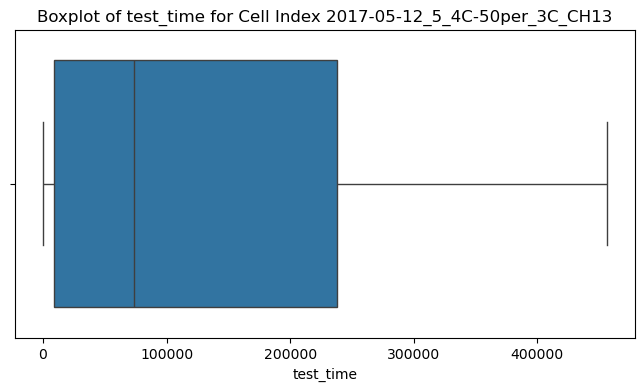

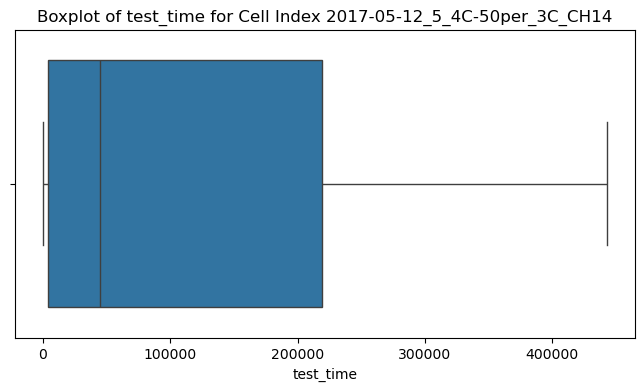

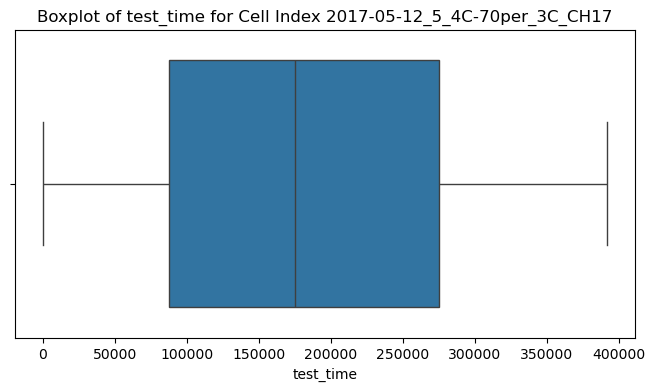

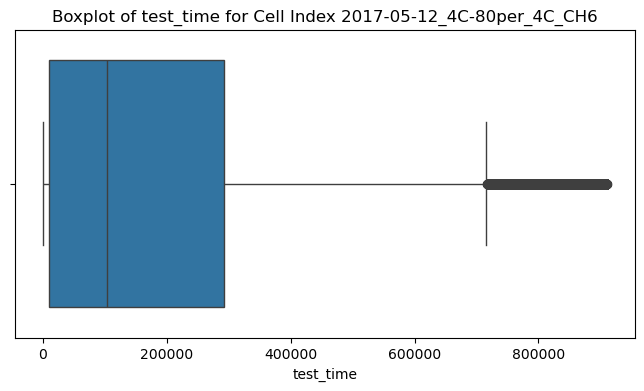

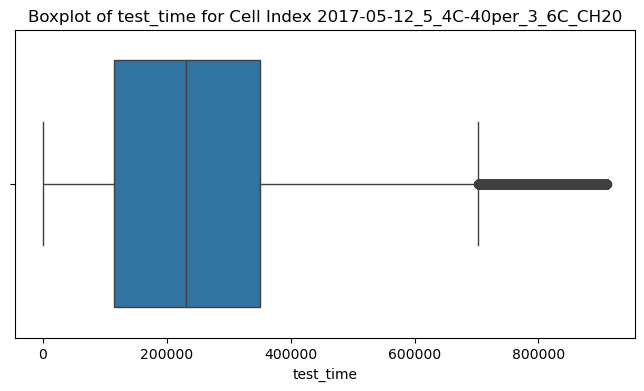

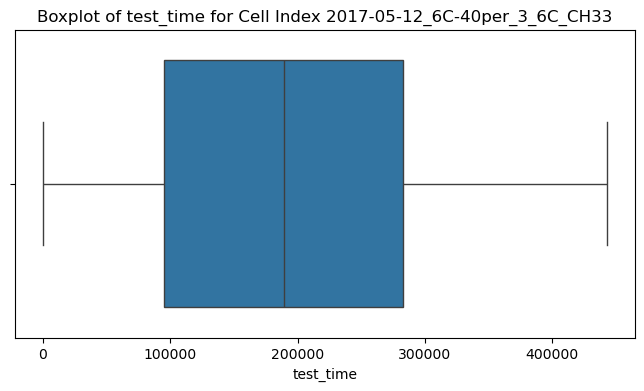

In [13]:
# outlier detection in internal_resistance by cell index
plot_boxplots_by_cell_index(df, ['test_time'])

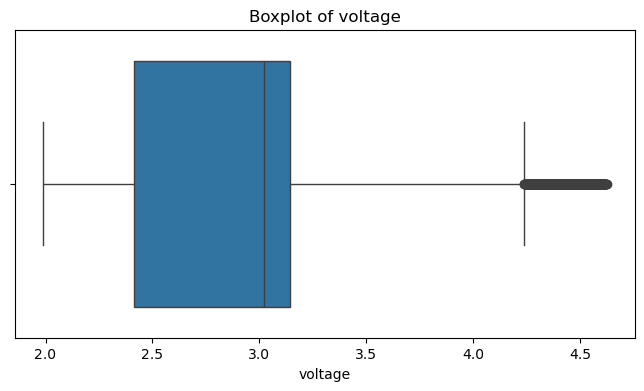

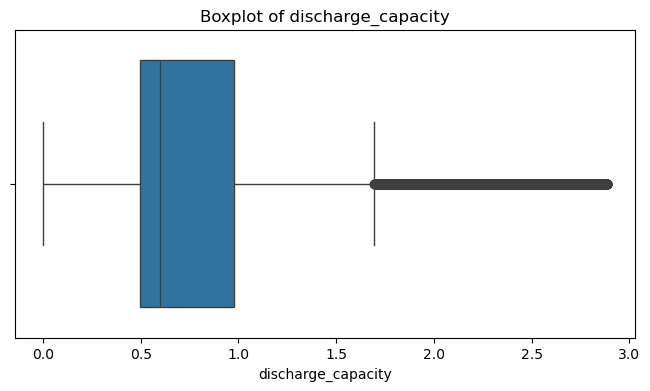

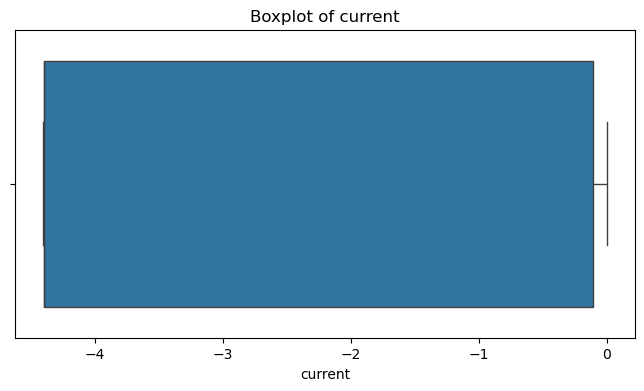

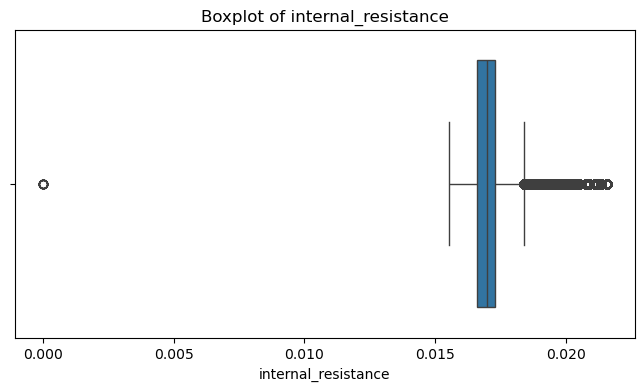

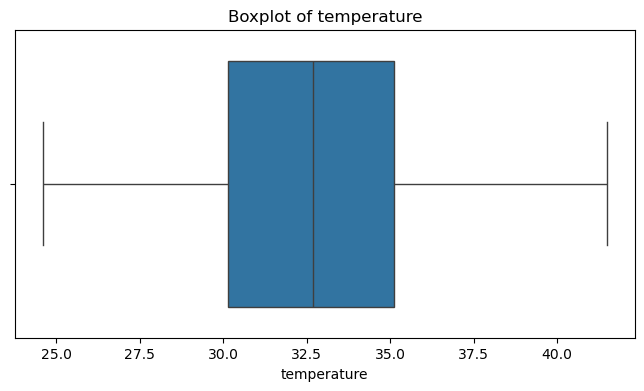

In [14]:
# outlier detection for considerationn of the all cell index
numerical_features = ['voltage', 'discharge_capacity', 'current', 'internal_resistance', 'temperature']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature)
    plt.show()

In [15]:
# Scatter plot for discharge capacity vs voltage, with the cycle index With Anomalies

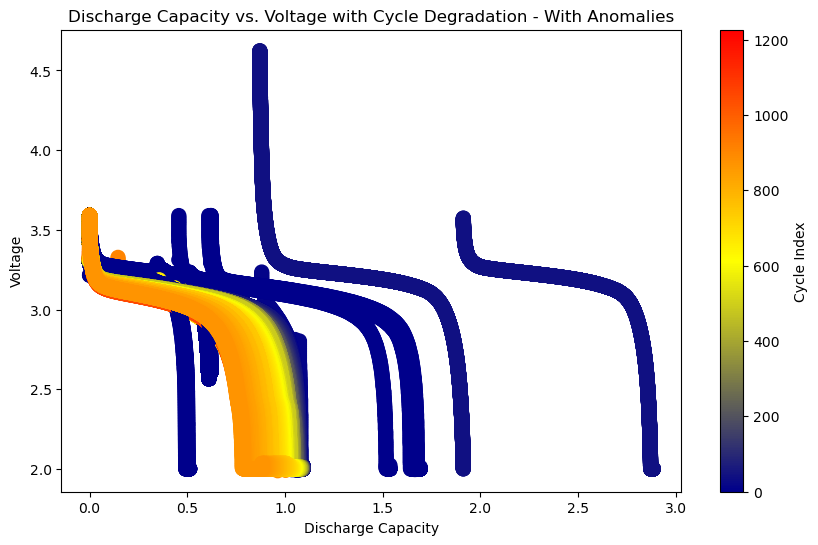

In [16]:
# Define the custom colormap (dark blue to yellow to red to dark red)
colors = ["#00008B", "#FFFF00", "#FF0000"]  # Dark Blue, Yellow, Red
cmap = mcolors.LinearSegmentedColormap.from_list("blue_yellow_red_darkred", colors)

# Normalize the cycle_index for color mapping
norm = plt.Normalize(df['cycle_index'].min(), df['cycle_index'].max())

# Create the plot
plt.figure(figsize=(10, 6))
sc = plt.scatter(df['discharge_capacity'], df['voltage'], c=df['cycle_index'], cmap=cmap, norm=norm, s=100)

# Add a color bar to show the cycle index
plt.colorbar(sc, label='Cycle Index')

# Add labels and title
plt.xlabel('Discharge Capacity')
plt.ylabel('Voltage')
plt.title('Discharge Capacity vs. Voltage with Cycle Degradation - With Anomalies')

# Display the plot
plt.show()


In [17]:
# Function to remove anomalies using Z-Score

In [18]:
def remove_anomalies_zscore(df, columns, group_col='cell_index', threshold=1):
    cleaned_data = []
    
    # Group by the cell index
    for cell, group in df.groupby(group_col):
        clean_group = group.copy()
        
        # Check anomalies for each column
        for col in columns:
            mean = group[col].mean()
            std = group[col].std()
            
            # Ensure proper index alignment
            mask = (group[col] >= mean - threshold * std) & (group[col] <= mean + threshold * std)
            clean_group = clean_group[mask.reindex(clean_group.index, fill_value=False)]
        
        # Append cleaned group
        cleaned_data.append(clean_group)
    
    # Combine all cleaned groups
    return pd.concat(cleaned_data, ignore_index=True)

In [19]:
# Columns to check for anomalies
columns_to_check =['test_time', 'cycle_index','voltage','discharge_capacity', 'current', 'internal_resistance','temperature']

# Remove anomalies using Z-Score
cleaned_data_zscore = remove_anomalies_zscore(df, columns=columns_to_check)

In [20]:
# Scatter plot for discharge capacity vs voltage, with the cycle index Without Anomalies

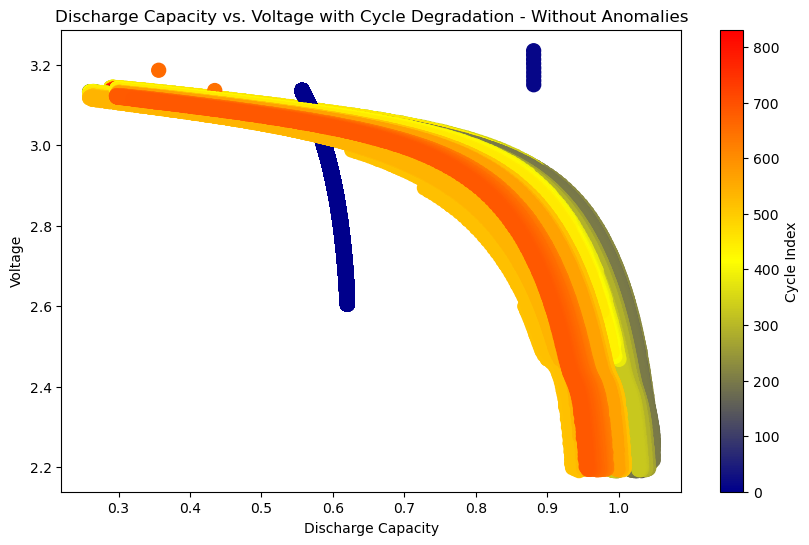

In [21]:
# Define the custom colormap (dark blue to yellow to red to dark red)
colors = ["#00008B", "#FFFF00", "#FF0000"]  # Dark Blue, Yellow, Red
cmap = mcolors.LinearSegmentedColormap.from_list("blue_yellow_red_darkred", colors)

# Normalize the cycle_index for color mapping
norm = plt.Normalize(cleaned_data_zscore['cycle_index'].min(), cleaned_data_zscore['cycle_index'].max())

# Create the plot
plt.figure(figsize=(10, 6))
sc = plt.scatter(cleaned_data_zscore['discharge_capacity'], cleaned_data_zscore['voltage'], c=cleaned_data_zscore['cycle_index'], cmap=cmap, norm=norm, s=100)

# Add a color bar to show the cycle index
plt.colorbar(sc, label='Cycle Index')

# Add labels and title
plt.xlabel('Discharge Capacity')
plt.ylabel('Voltage')
plt.title('Discharge Capacity vs. Voltage with Cycle Degradation - Without Anomalies')

# Save the plot to a file
# plt.savefig('discharge_capacity_vs_voltage.png', format='png')

# Display the plot
plt.show()

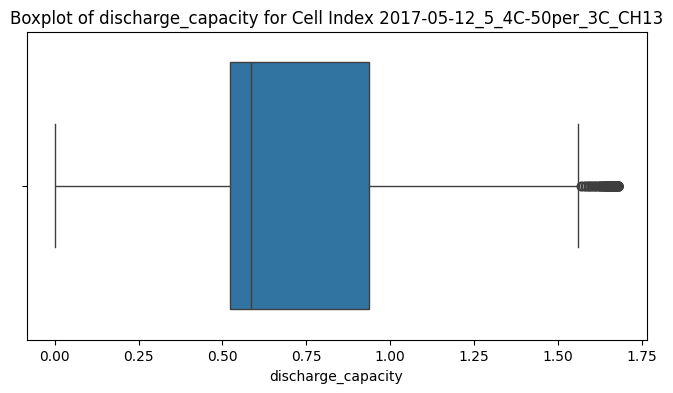

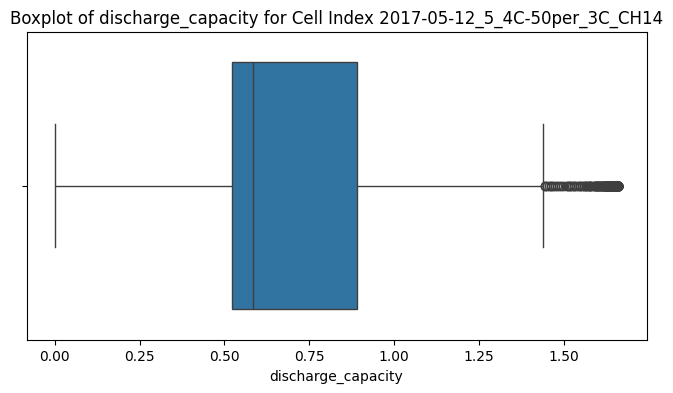

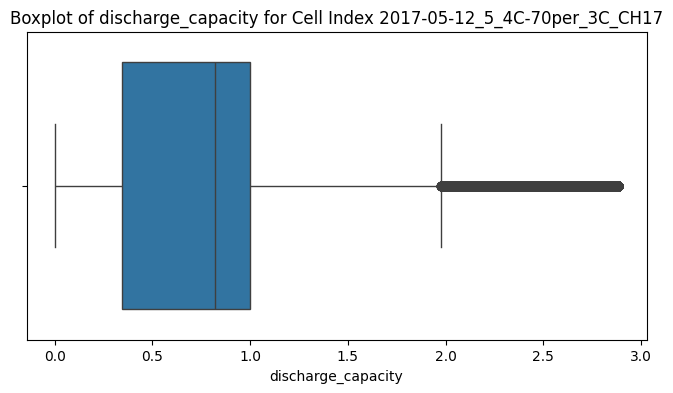

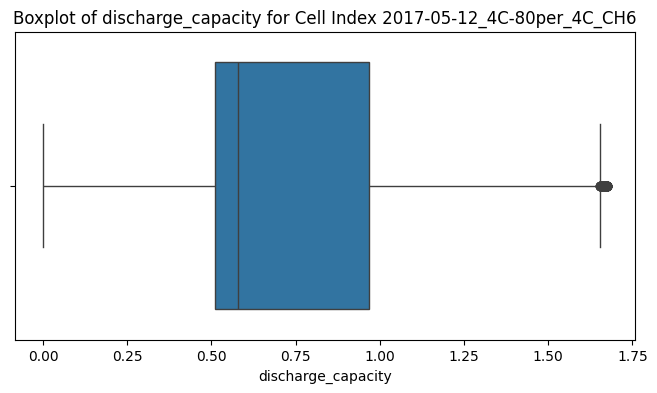

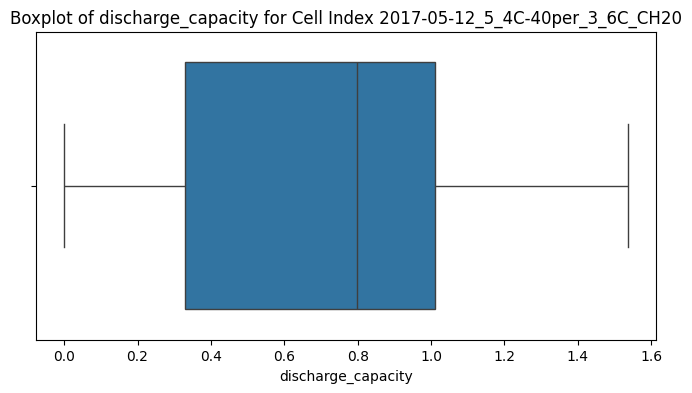

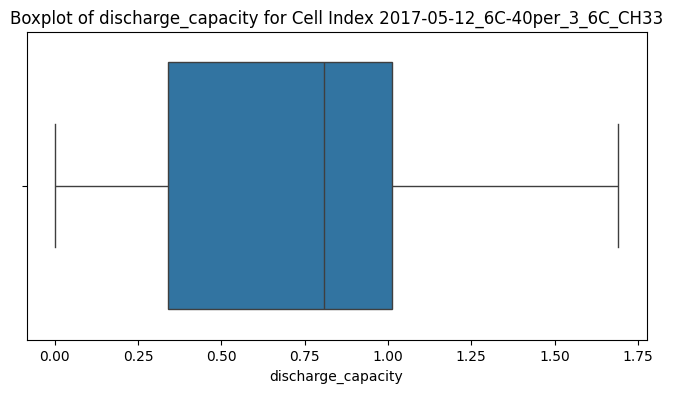

In [18]:
# outlier detection in  by cell index
plot_boxplots_by_cell_index(df, ['discharge_capacity'])

Opted for a Statistical methods for Anomaly Detection and removal instead of Machine Learning models (such as DBSCAN and Isolation Forest) due to the large data set size and high computational complexity of these models, which made them less efficient compared to statistical approaches.


In [22]:
# Save the cleaned data
# cleaned_data_zscore.to_csv("cleaned_data_zscore.csv", index=False)